In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('Emp_Sal.csv')

In [3]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
print(data.shape)
print('Rows:', data.shape[0])
print('Columns:', data.shape[1])

(375, 6)
Rows: 375
Columns: 6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
data.describe(include='all')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373,373,373,373.000000,373.000000
unique,NaN,2,3,174,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,194,224,12,NaN,NaN
mean,37.431635,NaN,NaN,NaN,10.030831,100577.345845
std,7.069073,NaN,NaN,NaN,6.557007,48240.013482
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,31.000000,NaN,NaN,NaN,4.000000,55000.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


In [7]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

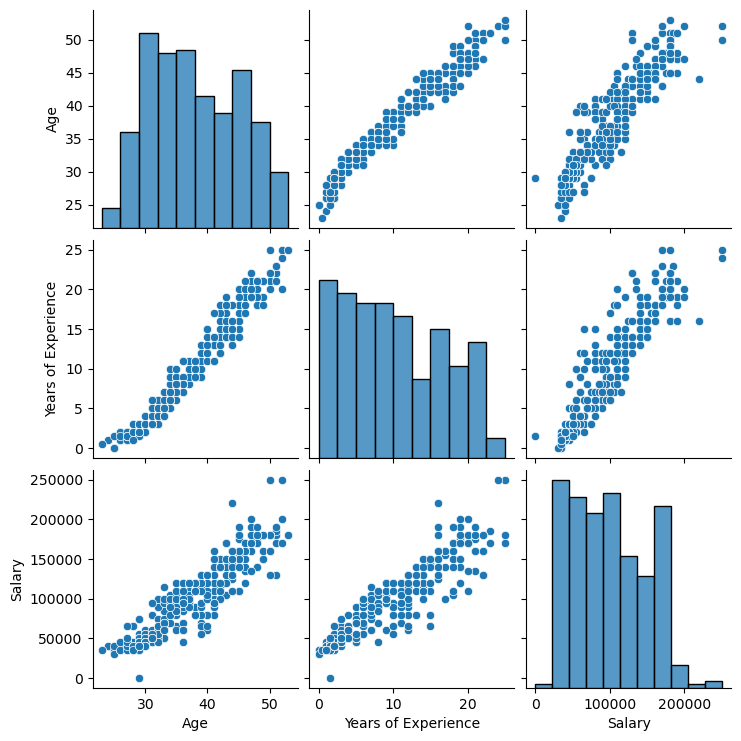

In [10]:
sns.pairplot(data)

<Axes: ylabel='Salary'>

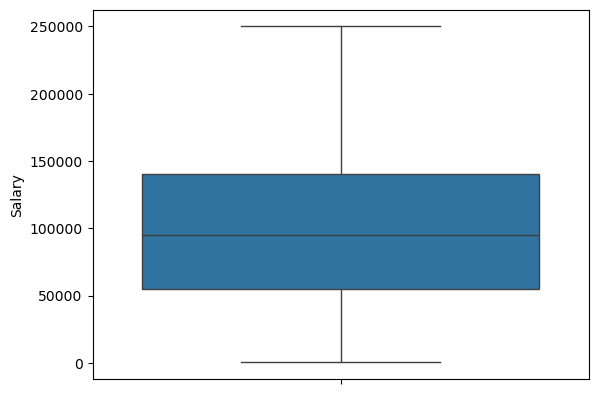

In [11]:
sns.boxplot(data['Salary'])

In [12]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [13]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

In [51]:
data['Gender'] = data['Gender'].astype('float')

In [17]:
data.duplicated().any()

True

In [18]:
data.drop_duplicates(keep='first', inplace=True)

In [19]:
data.duplicated().any()

False

In [21]:
data.shape

(324, 6)

In [24]:
corre = data[['Age', 'Years of Experience', 'Salary']].corr()
corre

,Age,Years of Experience,Salary
Age,1.000000,0.979192,0.916543
Years of Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

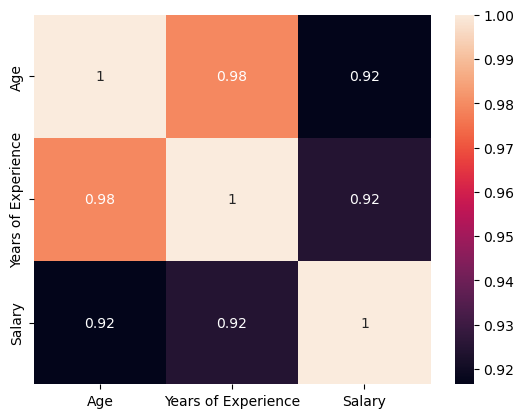

In [25]:
sns.heatmap(corre, annot=True)

<Axes: xlabel='Age', ylabel='count'>

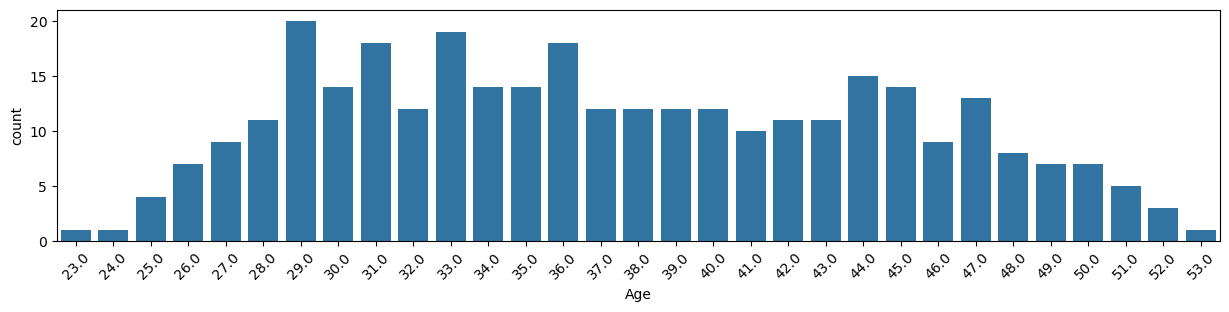

In [38]:
plt.figure(figsize=(15,3))
plt.xticks(rotation = 45)
sns.countplot(x = data['Age'], data=data)

<Axes: xlabel='Years of Experience', ylabel='count'>

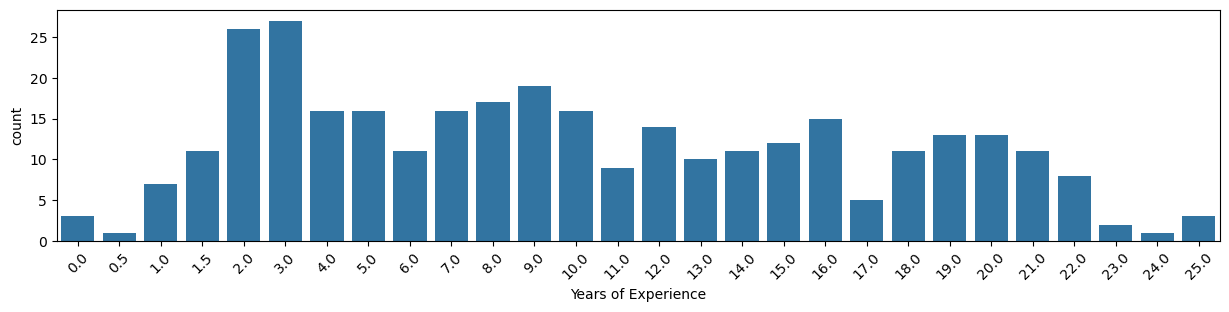

In [36]:
plt.figure(figsize=(15,3))
plt.xticks(rotation = 45)
sns.countplot(x = data['Years of Experience'], data=data)

In [41]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

<Axes: xlabel='Education Level', ylabel='count'>

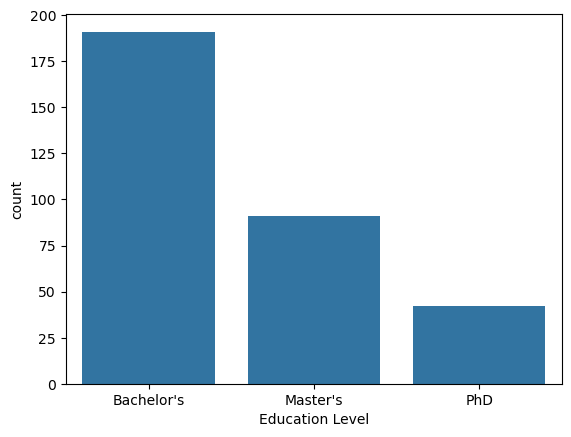

In [44]:
sns.countplot(x='Education Level', data=data)

In [52]:
data.dtypes

Age                    float64
Gender                 float64
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
data['Education Level'] = le.fit_transform(data['Education Level'])

In [55]:
data['Job Title'] = le.fit_transform(data['Job Title'])

In [56]:
data.head(1)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0.0,0,159,5.0,90000.0


In [58]:
data.corr()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
Age,1.000000,0.025034,0.540383,0.118619,0.979192,0.916543
Gender,0.025034,1.000000,0.024470,-0.039072,0.001367,-0.075420
Education Level,0.540383,0.024470,1.000000,0.113519,0.573912,0.661900
Job Title,0.118619,-0.039072,0.113519,1.000000,0.105513,0.135939
Years of Experience,0.979192,0.001367,0.573912,0.105513,1.000000,0.924455
Salary,0.916543,-0.075420,0.661900,0.135939,0.924455,1.000000


<Axes: >

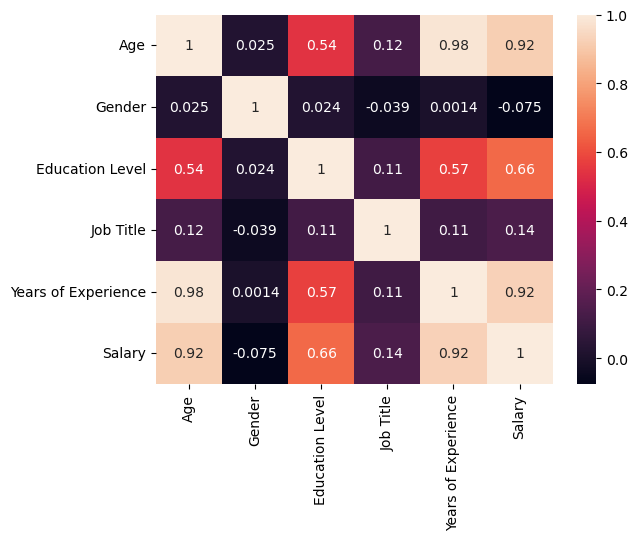

In [61]:
sns.heatmap(data.corr(), annot=True)

In [63]:
x = data.drop(columns=['Salary'])
y = data['Salary']

In [65]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
348     35000.0
349    110000.0
350    160000.0
351     55000.0
371    170000.0
Name: Salary, Length: 324, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [72]:
lr.fit(x_train, y_train)

LinearRegression()

In [79]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([117506.51518671, 124006.6877929 ,  47591.9821873 , 133466.63912306,
       109160.1839346 , 100806.91846197,  49766.50420295,  56132.14185354,
       162605.08951138,  43344.66400885,  40777.89468473, 122176.14772434,
       110079.50613116, 156786.03516979,  80983.66138398, 167558.70019998,
        95568.7398892 , 102980.13036738,  40733.50946599,  49557.18751675,
        73728.63828225,  66727.19681962,  63700.62008521,  32230.22076568,
       182592.68832362,  91900.48466133, 158467.26234827, 157554.27459957,
       183952.82551496,  35345.89739874, 126591.95775262, 162149.12540659,
        84368.40792824, 152571.52609408, 150681.36310583,  46744.31879288,
        87312.09860748,  90831.38010733,  99857.65952   ,  40766.32826964,
        88104.40010126,  54966.76231014, 107209.54768288,  54839.74160736,
        35741.39794097,  49205.94188798, 125448.1920724 ,  44110.28199097,
       162695.70871559,  82067.33467716, 151158.23073621,  44453.42329519,
        60712.67449251,  

In [77]:
(lr.score(x_test, y_test)) * 100

87.27165321003098

In [80]:
df = pd.DataFrame({'y_act':y_test, 'y_pred':y_pred_lr})

In [96]:
df['Error'] = df['y_act'] - df['y_pred']
df['Abs_error'] = abs(df['Error'])
df['MAE'] = df['Abs_error'].mean()
df.drop(columns='MAE', axis=1, inplace=True)
MAE = round(df['Error'].mean(), 2)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1724.32


In [98]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [92]:
r2_score(y_test, y_pred_lr)

0.8727165321003097

In [97]:
MSE = round(mean_squared_error(y_test, y_pred_lr), 2)
print("Mean Squared Error:", MSE)

Mean Squared Error: 296950420.6


In [100]:
rmse = round((MSE) ** 0.5, 2)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 17232.25


In [101]:
lr.coef_

array([ 3623.87971003, -8599.91289122, 18089.6706615 ,    22.4224926 ,
        1696.00511297])

In [102]:
lr.intercept_

-60743.556200513194